<a href="https://colab.research.google.com/github/gnapat/CNN_Imageclassified/blob/test_aug/deep_hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8f98ebeb-1264-8757-c96e-94705d3e666b)


In [2]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

#from tensorflow.keras.applications.vgg16 import preprocess_input

Python 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]

NumPy 1.23.5

Matplotlib 3.7.1

TensorFlow 2.14.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [69]:
def to_array(X):
  images=[]
  for x in X:
    img_array = tf.keras.preprocessing.image.img_to_array(x)
    images.append(img_array)

  X_ret = np.array(images)

  return X_ret




def do_augmentation(img,y,aug):

  ret_x=[]
  ret_y=[]

  if aug == 1:
    aug_list = [Image.FLIP_LEFT_RIGHT]
  elif aug == 2:
    aug_list = [Image.ROTATE_180]
  elif aug == 3:
    #aug_list = [Image.ROTATE_90,Image.ROTATE_180,Image.ROTATE_270]
    aug_list = [Image.ROTATE_90,Image.ROTATE_90,Image.ROTATE_90]
  elif aug == 4:
    #aug_list = [Image.ROTATE_90,Image.ROTATE_180,Image.ROTATE_270,Image.FLIP_LEFT_RIGHT,Image.ROTATE_90,Image.ROTATE_180,Image.ROTATE_270]
    aug_list = [Image.ROTATE_90,Image.ROTATE_90,Image.ROTATE_90,Image.FLIP_LEFT_RIGHT,Image.ROTATE_90,Image.ROTATE_90,Image.ROTATE_90]



  ret_x.append(img)
  ret_y.append(y)

  #img = tf.keras.utils.array_to_img(img)

  for iaug in aug_list:
    img = img.transpose(method=iaug)
    #img_arr = tf.keras.preprocessing.image.img_to_array(img)
    ret_x.append(img)
    ret_y.append(y)



  return ret_x,ret_y

def load_dataset(xlist,ylist,aug=0):

  images = []
  labels = []

  cc = 0
  for f in xlist:
    img = tf.keras.preprocessing.image.load_img(f, target_size=(224, 224))

    if aug != 0:
      # do aug
      img_aug , y_aug = do_augmentation(img=img,y=ylist[cc],aug=aug)

      images.extend(img_aug)
      labels.extend(y_aug)
      #pass

    else:
      #img = tf.keras.preprocessing.image.img_to_array(img)
      img = tf.keras.preprocessing.image.img_to_array(img)
      images.append(img)
      labels.append(ylist[cc])

    cc += 1

  return images,labels




def prepare_dataset(path,lables,test_size=0.2, random_state=42,split=True,augmentation=0,do_img_array=0):

  x = []
  y=[]
  x_path=[]
  images = []
  X_train = np.empty((244,244,3))
  X_test = np.array([])
  y_train = np.empty( (244,244,3))
  y_test =np.array([])

  for i in rock_label:
    folder_path=f"{path}/{rock_label[i]}"
    #print(folder_path)
    files = os.listdir(folder_path)
    for file in files:
      target_path = f"{folder_path}/{file}"
      #print(target_path)
      #img =  tf.keras.preprocessing.image.load_img(target_path, target_size=(224, 224))
      #img = tf.keras.preprocessing.image.img_to_array(img)
      #images.append(img)

      x_path.append(target_path)
      y.append(int(i))

  if split == True:
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(x_path, y, test_size=0.2, random_state=42)
    print(type(X_train_temp))
    X_train_temp, y_train_temp = load_dataset(X_train_temp,y_train_temp,augmentation)
    #print(type(X_train_temp))
    X_test_temp, y_test_temp = load_dataset(X_test_temp,y_test_temp,augmentation)

  if split == True:
    if do_img_array == 0:
      # return with image format
      return X_train_temp, X_test_temp, y_train_temp, y_test_temp
    else:
      # return with nunpy array
      X_train_temp = to_array(X_train_temp)
      X_test_temp = to_array(X_test_temp)

      return X_train_temp, X_test_temp, y_train_temp, y_test_temp
  else:
    return X,Y

path="drive/MyDrive/Gz/nida/dl/hw01/Rock"
#rock_label={"1":"Amphibolite","2":"Andesite","3":"Basalt","4":"Carbonatite","4":"Coal"}
rock_label={"1":"Amphibolite","2":"Andesite"}
#rock_label={"1":"Amphibolite"}

X_train,X_test,Y_train,Y_test = prepare_dataset(path=path,lables=rock_label,split=True,augmentation=4,do_img_array=1)

<class 'list'>


In [80]:
path="drive/MyDrive/Gz/nida/dl/hw01/Rock"
#rock_label={"1":"Amphibolite","2":"Andesite","3":"Basalt","4":"Carbonatite","4":"Coal"}
rock_label={"1":"Amphibolite","2":"Andesite","3":"Basalt"}
#rock_label={"1":"Amphibolite"}

X_train,X_test,Y_train,Y_test = prepare_dataset(path=path,lables=rock_label,split=True,augmentation=4,do_img_array=1)

<class 'list'>


In [81]:
X_train.shape


(728, 224, 224, 3)

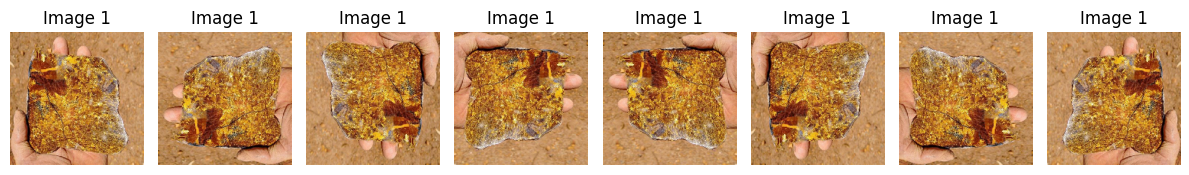

In [82]:
fig, axes = plt.subplots(1, 8, figsize=(12, 4))

for cc in range(8):
  axes[cc].imshow(tf.keras.preprocessing.image.array_to_img( X_train[cc+32]))
  axes[cc].set_title('Image 1')
  axes[cc].axis('off')



plt.tight_layout()
plt.show()

In [43]:
X_train.shape

(112, 224, 224, 3)

In [83]:
img_w,img_h = 224,224     # image size of CIFAR-10
vgg_extractor = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (img_w, img_h, 3))

vgg_extractor.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#tf.keras.utils.plot_model(vgg_extractor, to_file='cnn1_sequential.png', show_shapes=True, show_dtype=True, show_layer_names=False, dpi=96)

In [84]:
# Preprocess CIFAR-10 dataset to match VGG-16's requirements
x_train_vgg = tf.keras.applications.vgg16.preprocess_input(X_train)
x_test_vgg = tf.keras.applications.vgg16.preprocess_input(X_test)

print( x_train_vgg.dtype, x_train_vgg.shape, np.min(x_train_vgg), np.max(x_train_vgg) )
print( x_test_vgg.dtype, x_test_vgg.shape, np.min(x_test_vgg), np.max(x_test_vgg) )

float32 (728, 224, 224, 3) -123.68 151.061
float32 (184, 224, 224, 3) -123.68 151.061


In [85]:
vgg_extractor.trainable = False
for i,layer in enumerate(vgg_extractor.layers):
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_2 , trainable = False
Layer 1: name = block1_conv1 , trainable = False
Layer 2: name = block1_conv2 , trainable = False
Layer 3: name = block1_pool , trainable = False
Layer 4: name = block2_conv1 , trainable = False
Layer 5: name = block2_conv2 , trainable = False
Layer 6: name = block2_pool , trainable = False
Layer 7: name = block3_conv1 , trainable = False
Layer 8: name = block3_conv2 , trainable = False
Layer 9: name = block3_conv3 , trainable = False
Layer 10: name = block3_pool , trainable = False
Layer 11: name = block4_conv1 , trainable = False
Layer 12: name = block4_conv2 , trainable = False
Layer 13: name = block4_conv3 , trainable = False
Layer 14: name = block4_pool , trainable = False
Layer 15: name = block5_conv1 , trainable = False
Layer 16: name = block5_conv2 , trainable = False
Layer 17: name = block5_conv3 , trainable = False
Layer 18: name = block5_pool , trainable = False


In [86]:
x = vgg_extractor.output

# Add our custom layer(s) to the end of the existing model
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
new_outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# Construct the main model
model = tf.keras.models.Model(inputs=vgg_extractor.inputs, outputs=new_outputs)

In [ ]:
tf.keras.utils.plot_model(model, to_file='vggoutput1.png', show_shapes=True, show_dtype=True, show_layer_names=False, dpi=96)

In [87]:
model.compile( loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"] )

In [88]:
Y_train = np.array(Y_train)
history = model.fit( x_train_vgg, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2 )

Epoch 1/20
5/5 [==============================] - 16s 4s/step - loss: 41.1083 - acc: 0.3625 - val_loss: 39.9389 - val_acc: 0.6438
Epoch 2/20
5/5 [==============================] - 3s 678ms/step - loss: 18.6240 - acc: 0.7079 - val_loss: 32.3280 - val_acc: 0.5411
Epoch 3/20
5/5 [==============================] - 4s 809ms/step - loss: 9.0171 - acc: 0.8265 - val_loss: 19.1978 - val_acc: 0.6644
Epoch 4/20
5/5 [==============================] - 3s 647ms/step - loss: 3.4718 - acc: 0.9072 - val_loss: 28.4863 - val_acc: 0.7055
Epoch 5/20
5/5 [==============================] - 3s 641ms/step - loss: 2.4105 - acc: 0.9296 - val_loss: 20.4422 - val_acc: 0.6507
Epoch 6/20
5/5 [==============================] - 4s 803ms/step - loss: 1.6310 - acc: 0.9502 - val_loss: 23.4697 - val_acc: 0.6370
Epoch 7/20
5/5 [==============================] - 3s 653ms/step - loss: 0.7747 - acc: 0.9708 - val_loss: 16.3557 - val_acc: 0.7055
Epoch 8/20
5/5 [==============================] - 4s 797ms/step - loss: 0.3159 - ac

In [89]:
Y_test = np.array(Y_test)
results = model.evaluate(x_test_vgg, Y_test, batch_size=128)
print( f"{model.metrics_names}: {results}" )

2/2 [==============================] - 8s 8s/step - loss: 30.2378 - acc: 0.6033
['loss', 'acc']: [30.23784065246582, 0.60326087474823]
